In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


-----------------------------------------------------
## Age gender buckets

Population_in_thousands column refer to the population of the entire country (divided into age and gender buckets).

In [2]:
age_gender_df = pd.read_csv('./assets/age_gender_bkts.csv/age_gender_bkts.csv')
age_gender_df.drop(['year'],axis=1,inplace=True)
print age_gender_df.shape
age_gender_df.head(5)

(420, 4)


,age_bucket,country_destination,gender,population_in_thousands
0,100+,AU,male,1.0
1,95-99,AU,male,9.0
2,90-94,AU,male,47.0
3,85-89,AU,male,118.0
4,80-84,AU,male,199.0


In [3]:
age_gender_df.describe()

,population_in_thousands
count,420.000000
mean,1743.133333
std,2509.843202
min,0.000000
25%,396.500000
50%,1090.500000
75%,1968.000000
max,11601.000000


In [4]:
age_cntr_gndr = age_gender_df.groupby(['country_destination', 'gender']).sum()
age_cntr_gndr

population_in_thousands
country_destination gender                         
AU                  female                  12024.0
                    male                    11899.0
CA                  female                  18066.0
                    male                    17805.0
DE                  female                  41997.0
                    male                    40565.0
ES                  female                  23870.0
                    male                    23333.0
FR                  female                  33493.0
                    male                    31490.0
GB                  female                  32345.0
                    male                    31495.0
IT                  female                  31405.0
                    male                    29740.0
NL                  female                   8486.0
                    male                     8362.0
PT                  female                   5468.0
                    male                     5141.0
US                  female                 165053.0
                    male                   160079.0

In [5]:
percent = []
for row in age_gender_df.values:
    ct = row[1]
    gndr = row[2]
    cntr_gndr_t = (age_cntr_gndr.loc[ct]).loc[gndr].values
    pop_cell = row[3]
    age_gndr_prcnt = (pop_cell/cntr_gndr_t)*100
    age_gndr_prcnt = np.array(age_gndr_prcnt, float)
    percent.append(age_gndr_prcnt)
age_gender_df['population_percentile'] = percent
age_gender_df.population_percentile = age_gender_df.population_percentile.astype(float)
gbkt_map = {}
for i in range(21):
    gbkt=age_gender_df.age_bucket[i]
    gbkt_map[gbkt] = i+1
age_gender_df['order'] = age_gender_df.age_bucket.map(gbkt_map)
age_gender_df.sort_values(['country_destination', 'gender', 'order'],axis=0,inplace=True)
age_gender_df.reset_index(inplace=True,drop=True)
age_gender_df.head()

,age_bucket,country_destination,gender,population_in_thousands,population_percentile,order
0,100+,AU,female,4.0,0.033267,1
1,95-99,AU,female,25.0,0.207917,2
2,90-94,AU,female,94.0,0.781770,3
3,85-89,AU,female,179.0,1.488689,4
4,80-84,AU,female,252.0,2.095808,5


In [6]:
young = range(14,18)
prc_yng_df = age_gender_df[age_gender_df.order.isin(young)]
prc_young = prc_yng_df.groupby('country_destination')['population_percentile'].sum()
prc_young = [round(x,2) for x in prc_young]

# ______

AU
0.0332667997339
21     100+
22    95-99
23    90-94
24    85-89
25    80-84
26    75-79
27    70-74
28    65-69
29    60-64
30    55-59
31    50-54
32    45-49
33    40-44
34    35-39
35    30-34
36    25-29
37    20-24
38    15-19
39    10-14
40      5-9
41      0-4
Name: age_bucket, dtype: object


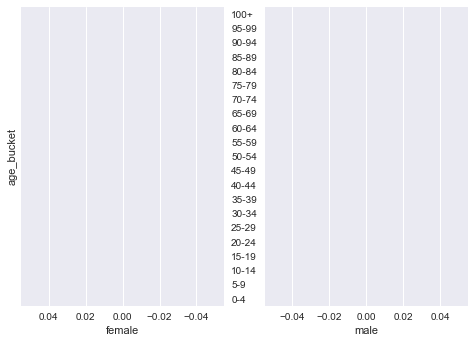

CA
0.0387468172257
63     100+
64    95-99
65    90-94
66    85-89
67    80-84
68    75-79
69    70-74
70    65-69
71    60-64
72    55-59
73    50-54
74    45-49
75    40-44
76    35-39
77    30-34
78    25-29
79    20-24
80    15-19
81    10-14
82      5-9
83      0-4
Name: age_bucket, dtype: object


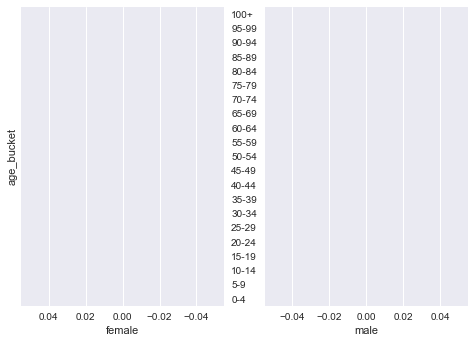

DE
0.0333357144558
105     100+
106    95-99
107    90-94
108    85-89
109    80-84
110    75-79
111    70-74
112    65-69
113    60-64
114    55-59
115    50-54
116    45-49
117    40-44
118    35-39
119    30-34
120    25-29
121    20-24
122    15-19
123    10-14
124      5-9
125      0-4
Name: age_bucket, dtype: object


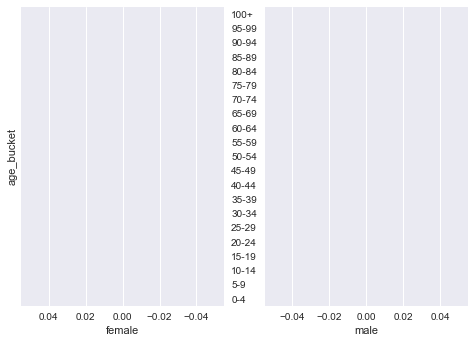

ES
0.0377042312526
147     100+
148    95-99
149    90-94
150    85-89
151    80-84
152    75-79
153    70-74
154    65-69
155    60-64
156    55-59
157    50-54
158    45-49
159    40-44
160    35-39
161    30-34
162    25-29
163    20-24
164    15-19
165    10-14
166      5-9
167      0-4
Name: age_bucket, dtype: object


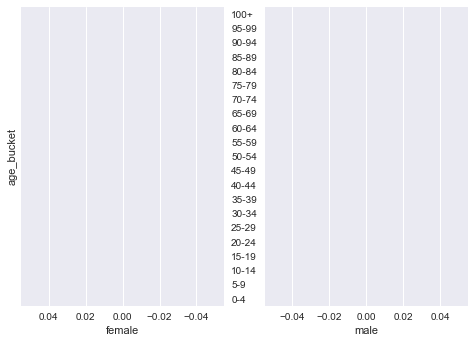

FR
0.0567282715791
189     100+
190    95-99
191    90-94
192    85-89
193    80-84
194    75-79
195    70-74
196    65-69
197    60-64
198    55-59
199    50-54
200    45-49
201    40-44
202    35-39
203    30-34
204    25-29
205    20-24
206    15-19
207    10-14
208      5-9
209      0-4
Name: age_bucket, dtype: object


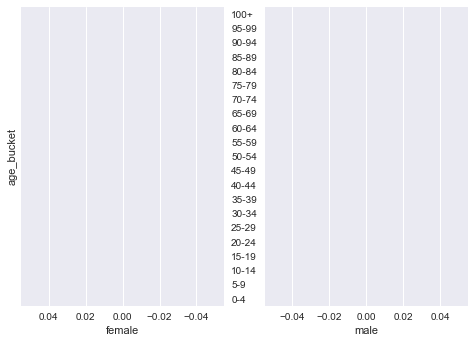

GB
0.0401916834132
231     100+
232    95-99
233    90-94
234    85-89
235    80-84
236    75-79
237    70-74
238    65-69
239    60-64
240    55-59
241    50-54
242    45-49
243    40-44
244    35-39
245    30-34
246    25-29
247    20-24
248    15-19
249    10-14
250      5-9
251      0-4
Name: age_bucket, dtype: object


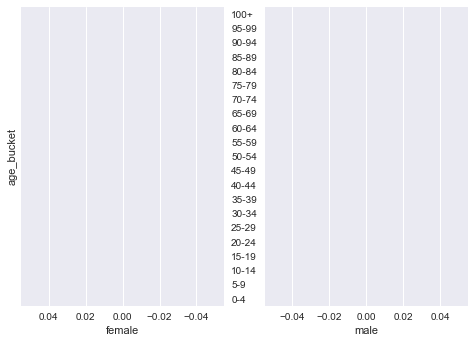

IT
0.0477630950486
273     100+
274    95-99
275    90-94
276    85-89
277    80-84
278    75-79
279    70-74
280    65-69
281    60-64
282    55-59
283    50-54
284    45-49
285    40-44
286    35-39
287    30-34
288    25-29
289    20-24
290    15-19
291    10-14
292      5-9
293      0-4
Name: age_bucket, dtype: object


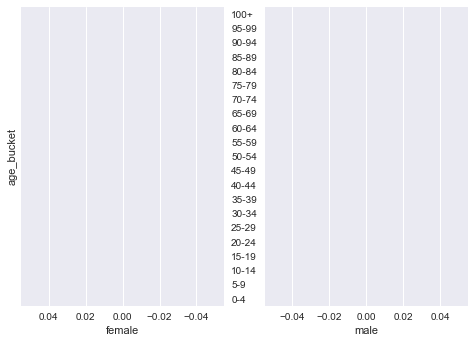

NL
0.0235682300259
315     100+
316    95-99
317    90-94
318    85-89
319    80-84
320    75-79
321    70-74
322    65-69
323    60-64
324    55-59
325    50-54
326    45-49
327    40-44
328    35-39
329    30-34
330    25-29
331    20-24
332    15-19
333    10-14
334      5-9
335      0-4
Name: age_bucket, dtype: object


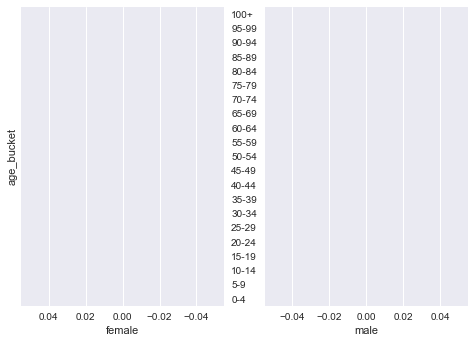

PT
0.0182882223848
357     100+
358    95-99
359    90-94
360    85-89
361    80-84
362    75-79
363    70-74
364    65-69
365    60-64
366    55-59
367    50-54
368    45-49
369    40-44
370    35-39
371    30-34
372    25-29
373    20-24
374    15-19
375    10-14
376      5-9
377      0-4
Name: age_bucket, dtype: object


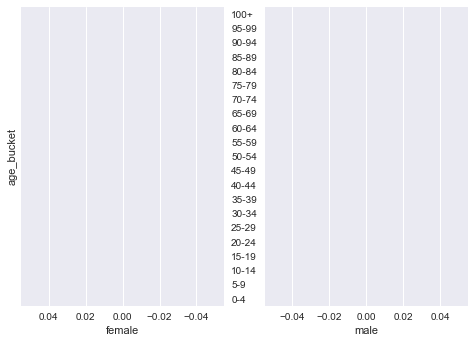

US
0.0369578256681
399     100+
400    95-99
401    90-94
402    85-89
403    80-84
404    75-79
405    70-74
406    65-69
407    60-64
408    55-59
409    50-54
410    45-49
411    40-44
412    35-39
413    30-34
414    25-29
415    20-24
416    15-19
417    10-14
418      5-9
419      0-4
Name: age_bucket, dtype: object


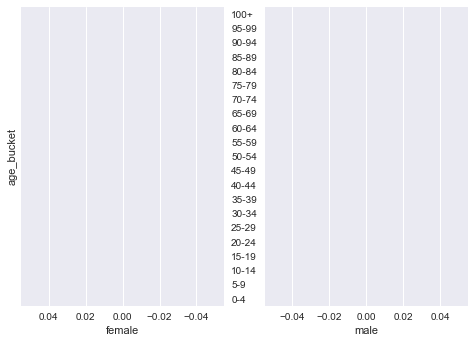

In [7]:
countries = age_gender_df.country_destination.unique()
for cnt in countries:
#     cnt_df = age_gender_df[age_gender_df.country_destination == cnt]
    print cnt
    male = age_gender_df[(age_gender_df.country_destination == cnt) &\
                         (age_gender_df.gender == 'male')]['population_percentile'].values.tolist()
    female = age_gender_df[(age_gender_df.country_destination == cnt) &\
                      (age_gender_df.gender == 'female')]['population_percentile'].values.tolist()
    print female[0]
    bkt = age_gender_df[(age_gender_df.country_destination == cnt) & (age_gender_df.gender == 'male')]['age_bucket']
    f, (ax2, ax1) = plt.subplots(1,2,sharey=True)
    print bkt
    sns.barplot(male,bkt, ax=ax1, color="blue")
    sns.barplot(female,bkt, ax=ax2, color="red").invert_xaxis()
    ax2.yaxis.tick_right()
    ax1.set_ylabel('')  
    ax2.set_xlabel('female')
    ax1.set_xlabel('male')
    sns.plt.show()

In [57]:
# fig, axes = plt.subplots(ncols=2, sharey=True)
# axes[0].barh(a, b)
# axes[0].set(title='male')
# axes[1].barh(c, b)
# axes[1].set(title='female')

# # axes[0].invert_xaxis()
# # axes[0].set(yticks=y, yticklabels=states)
# # axes[0].yaxis.tick_right()

## _____________________

In [59]:
f, (ax2, ax1) = plt.subplots(1,2,sharey=True)
sns.barplot(a,b, ax=ax1, color="blue")
sns.barplot(c,b, ax=ax2, color="red").invert_xaxis()

# ax2.set(yticks=b)
ax2.yaxis.tick_right()
ax1.set_ylabel('')  
ax2.set_xlabel('female')
ax1.set_xlabel('male')
sns.plt.show()

In [ ]:
a = age_gender_df[(age_gender_df.country_destination == 'AU') & (age_gender_df.gender == 'male')]['population_percentile'].values.tolist()
b = age_gender_df[(age_gender_df.country_destination == 'AU') & (age_gender_df.gender == 'male')]['age_bucket']
c = age_gender_df[(age_gender_df.country_destination == 'AU') & (age_gender_df.gender == 'female')]['population_percentile'].values.tolist()
d = age_gender_df[(age_gender_df.country_destination == 'AU') & (age_gender_df.gender == 'female')]['age_bucket']

In [ ]:
t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.exp(-t)
s3 = np.sin(4*np.pi*t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

# ______

In [21]:
pd.pivot_table(age_gender_df,index=['order','age_bucket'],\
               columns=['country_destination'],values=['population_in_thousands'], aggfunc='sum')

population_in_thousands                                  \
country_destination                      AU      CA      DE      ES      FR   
order age_bucket                                                              
1     100+                              5.0     8.0    17.0    12.0    22.0   
2     95-99                            34.0    55.0    88.0    86.0   102.0   
3     90-94                           141.0   221.0   645.0   368.0   629.0   
4     85-89                           297.0   483.0  1505.0   869.0  1243.0   
5     80-84                           451.0   740.0  2502.0  1402.0  1849.0   
6     75-79                           636.0   976.0  4353.0  1594.0  2141.0   
7     70-74                           853.0  1365.0  4461.0  1920.0  2420.0   
8     65-69                          1166.0  1887.0  4137.0  2370.0  3765.0   
9     60-64                          1296.0  2236.0  5374.0  2551.0  3956.0   
10    55-59                          1453.0  2592.0  5979.0  3010.0  4064.0   
11    50-54                          1576.0  2791.0  7127.0  3460.0  4357.0   
12    45-49                          1571.0  2449.0  6882.0  3761.0  4414.0   
13    40-44                          1658.0  2348.0  5192.0  3976.0  4443.0   
14    35-39                          1598.0  2381.0  4850.0  4083.0  3698.0   
15    30-34                          1746.0  2502.0  5198.0  3394.0  4081.0   
16    25-29                          1746.0  2493.0  5088.0  2627.0  4122.0   
17    20-24                          1607.0  2362.0  4427.0  2281.0  3987.0   
18    15-19                          1505.0  2063.0  4050.0  2114.0  3932.0   
19    10-14                          1450.0  1912.0  3692.0  2313.0  3879.0   
20    5-9                            1529.0  1971.0  3471.0  2542.0  3906.0   
21    0-4                            1605.0  2036.0  3524.0  2470.0  3973.0   

                                                             
country_destination      GB      IT      NL     PT       US  
order age_bucket                                             
1     100+             16.0    18.0     2.0    1.0     74.0  
2     95-99           110.0   101.0    19.0   12.0    476.0  
3     90-94           455.0   600.0    94.0   64.0   1734.0  
4     85-89           967.0  1295.0   229.0  174.0   3900.0  
5     80-84          1557.0  2039.0   389.0  316.0   5836.0  
6     75-79          2144.0  2725.0   541.0  421.0   8173.0  
7     70-74          2695.0  2905.0   726.0  484.0  11457.0  
8     65-69          3593.0  3609.0  1045.0  580.0  16044.0  
9     60-64          3468.0  3629.0  1047.0  649.0  19221.0  
10    55-59          3916.0  4045.0  1161.0  709.0  21953.0  
11    50-54          4526.0  4695.0  1282.0  775.0  22426.0  
12    45-49          4650.0  4956.0  1287.0  781.0  21113.0  
13    40-44          4248.0  4839.0  1165.0  834.0  20467.0  
14    35-39          3943.0  4207.0   980.0  833.0  20681.0  
15    30-34          4302.0  3605.0  1000.0  733.0  21847.0  
16    25-29          4335.0  3283.0  1023.0  608.0  22396.0  
17    20-24          4018.0  3115.0  1031.0  560.0  22695.0  
18    15-19          3647.0  2904.0   994.0  543.0  21595.0  
19    10-14          3461.0  2856.0  1010.0  554.0  21117.0  
20    5-9            3920.0  2868.0   923.0  514.0  20833.0  
21    0-4            3869.0  2851.0   900.0  464.0  21094.0

In [23]:
countries = age_gender_df.country_destination.unique()
ge=[x for x in range(99,3,-5)]
ge.insert(0,100)
ave_age_country_dict = {}
for cnt in countries:
    df = age_gender_df[age_gender_df.country_destination == cnt]
    bkt_pop = df.groupby(['age_bucket','order'])['population_in_thousands'].sum()
    total_pop = bkt_pop.sum()
    bkt_pop = bkt_pop.sortlevel(1).values
    ave_age_cnt = (bkt_pop*ge).sum()/total_pop
    ave_age_cnt = round(ave_age_cnt,2)
    ave_age_country_dict[cnt] = ave_age_cnt
ave_age_country_dict

{'AU': 40.08,
 'CA': 42.08,
 'DE': 46.21,
 'ES': 43.83,
 'FR': 42.53,
 'GB': 42.16,
 'IT': 45.84,
 'NL': 42.92,
 'PT': 44.46,
 'US': 40.13}

In [85]:
# au_df = age_gender_df[age_gender_df.country_destination == 'AU']
# augp = au_df.groupby(['age_bucket','order'])['population_in_thousands'].sum()
# aut = augp.sum()
# augp = augp.sortlevel(1).values
# print aut
# print augp
# print augp*ge
# (augp*ge).sum()/augp.sum()

In [33]:
ave_age_country_dict.values()

[42.53, 42.92, 44.46, 42.08, 46.21, 45.84, 40.13, 40.08, 42.16, 43.83]

In [60]:
country_population_df = pd.DataFrame(age_gender_df.groupby('country_destination')['population_in_thousands'].agg('sum').head(50))
country_population_df.population_in_thousands = country_population_df.population_in_thousands/1000
country_population_df['population_M']=country_population_df['population_in_thousands']
country_population_df.drop('population_in_thousands',axis=1,inplace=True)
country_population_df['prc_young'] = prc_young
country_population_df['avg_age'] = ave_age_country_dict.values()
country_population_df

,population_M,prc_young,avg_age
country_destination,,,
AU,23.923,55.99,42.53
CA,35.871,54.30,42.92
DE,82.562,47.42,44.46
ES,47.203,52.50,42.08
FR,64.983,48.96,46.21
GB,63.840,52.02,45.84
IT,61.145,46.53,40.13
NL,16.848,47.89,40.08
PT,10.609,51.61,42.16


In [61]:
country_population_df.loc['AU']

population_M    23.923
prc_young       55.990
avg_age         42.530
Name: AU, dtype: float64

-----------------------------------------------------
## Countries

In [62]:
countries_df = pd.read_csv('./assets/countries.csv/countries.csv')
print countries_df.shape
countries_df.head()

(10, 7)


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [63]:
countries_final_df = pd.merge(countries_df, country_population_df, left_on='country_destination',right_index=True)
countries_final_df

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,population_M,prc_young,avg_age
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00,23.923,55.99,42.53
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00,35.871,54.30,42.92
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61,82.562,47.42,44.46
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25,47.203,52.50,42.08
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06,64.983,48.96,46.21
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00,63.840,52.02,45.84
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40,61.145,46.53,40.13
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22,16.848,47.89,40.08
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45,10.609,51.61,42.16
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00,325.132,53.92,43.83


In [64]:
countries_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 10 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
population_M                     10 non-null float64
prc_young                        10 non-null float64
avg_age                          10 non-null float64
dtypes: float64(8), object(2)
memory usage: 880.0+ bytes


In [52]:
countries_final_df.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance,population_M,prc_young,avg_population
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000,10.000000,10.000000,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900,73.211600,51.114000,43.02400
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169,91.559654,3.240028,2.10098
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000,10.609000,46.530000,40.08000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000,26.910000,48.157500,42.10000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500,54.174000,51.815000,42.72500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500,64.697250,53.565000,44.30250
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000,325.132000,55.990000,46.21000


In [53]:
print (len(countries_final_df['destination_language '].unique()))
countries_final_df['destination_language '].unique()

7


array(['eng', 'deu', 'spa', 'fra', 'ita', 'nld', 'por'], dtype=object)

In [50]:
print (len(countries_final_df['language_levenshtein_distance'].unique()))
countries_final_df['language_levenshtein_distance'].unique()

7


array([  0.  ,  72.61,  92.25,  92.06,  89.4 ,  63.22,  95.45])

In [65]:
countries_final_df.to_pickle('./countries_age.pkl')  # where to save it, usually as a .pkl
# df = pd.read_pickle(file_name)

In [ ]:
# df.to_csv(file_name, sep='\t', encoding='utf-8')